<h1 style="font-size:40px; font-weight:bold; color:#D2B48C;">Drug Exploration, Reactions & Health Links</h1>


 This notebook explores how various drugs are connected to side effects and user profiles using a data-driven approach. The goal is to uncover patterns and associations between different medications and user-reported reactions.
 ## Problem Statement

The healthcare industry continuously seeks to better understand how different drugs affect users based on medical and personal factors. This project uses a dataset containing drug names, their side effects, and contextual medical attributes to:

- Explore which drugs are most frequently associated with negative or positive effects
- Analyze patterns across user demographics and drug classes
- Apply **association rule mining (Apriori algorithm)** to discover frequent combinations of symptoms or outcomes

These insights can be valuable for:
- Patients evaluating medication choices
- Doctors adjusting prescriptions
- Health tech platforms flagging risky drug combinations



# Importing Required Libraries:

We begin by importing essential libraries for:

- Data handling (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Preprocessing (`LabelEncoder`, `StandardScaler`)
- Association Rule Mining (`mlxtend.frequent_patterns`)


In [1]:
# Importing all necessary libraries for data handling, visualization, preprocessing, and association rule mining

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules

sns.set(style='whitegrid')


# Reading the Dataset:
We load the main dataset, which contains:

- Drug names
- Reported side effects
- Usage ratings
- Medical conditions

This will allow us to explore both the frequency and impact of different medications.

In [2]:
# Reading the main dataset containing drug names, side effects, and related medical information

df = pd.read_csv('drugs_side_effects_drugs_com.csv')
df.head()


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [3]:
# Checking basic structure of the dataset: number of rows/columns, column names, and data types

print(df.shape)        # Shows total rows and columns (e.g., 2931 rows, 17 columns)
print(df.columns)       # Lists all column names
print(df.info())         # Provides a concise summary of the DataFrame including non-null counts and data types


(2931, 17)
Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_ot

# Clean & Preprocess the Data:
Before we run any mining algorithms, we need to clean:

- Replace `"Unknown"` or `%` values
- Handle missing values
- Convert categorical values into numeric using `LabelEncoder`
- Ensure numerical columns like `rating` and `no_of_reviews` are treated correctly

This step ensures our dataset is usable for rule mining and correlation analysis.

In [4]:
# Filling all missing values with 'Unknown' so I can proceed with analysis without dropping any rows

df.fillna('Unknown', inplace=True)
print("Remaining missing values:", df.isnull().sum().sum())
df['activity'] = df['activity'].astype(str)   # Convert all entries to string
df['activity'] = df['activity'].str.replace('%', '', regex=False).str.strip() # Remove '%' and strip whitespace
      
# Replacing text categories with numeric equivalents
df['activity'] = df['activity'].replace({
    'High': 90,
    'Moderate': 60,
    'Low': 30,
    'Unknown': None  # Let 'Unknown' become NaN
})
# Cleaning 'rating' column
df['rating'] = df['rating'].astype(str)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # turns 'Unknown' into NaN      

df['no_of_reviews'] = df['no_of_reviews'].astype(str)
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'], errors='coerce')  # Clean 'no_of_reviews' column

df.dropna(subset=['rating', 'no_of_reviews', 'activity'], inplace=True)  # Drop rows where these columns are NaN

Remaining missing values: 0


C:\Users\kjha0\AppData\Local\Temp\ipykernel_7836\1930686416.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)


In [14]:
# Label encoding only relevant categorical columns (not text-heavy ones) to convert them into numerical form for analysis

le = LabelEncoder()
for col in ['pregnancy_category', 'rx_otc', 'csa', 'generic_name', 'medical_condition', 'side_effects']:
    df[col] = le.fit_transform(df[col])
df.head()


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,2,15,366,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87,1,3,5,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,2,995,816,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82,1,2,5,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,2,1504,639,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48,1,3,5,Unknown,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,2,1416,541,"Miscellaneous antineoplastics, Miscellaneous u...",Unknown,41,1,6,5,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,2,604,275,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39,1,1,5,Unknown,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [5]:
# Since 'side_effects' contains multiple values in a single string, I'm converting each row into a list of individual effects

df['Hives'] = df['side_effects'].astype(str).str.contains('hives', case=False)
df['Difficult Breathing'] = df['side_effects'].astype(str).str.contains('difficult breathing|difficulty breathing', case=False)
df['Itching'] = df['side_effects'].astype(str).str.contains('itching', case=False)
df[['Hives', 'Difficult Breathing', 'Itching']].head()


,Hives,Difficult Breathing,Itching
0,True,True,True
1,True,True,False
2,False,False,True
3,False,False,False
4,True,True,True


# Visualize Drug Ratings:

We use a histogram to observe the distribution of drug ratings.
This helps categorize how users perceive the effectiveness or satisfaction with each drug.

We also bin ratings into groups:
- Very Low, Low, Medium, High, Very High

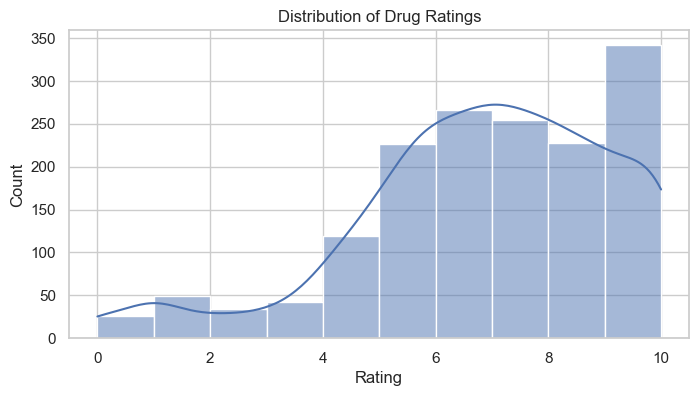

rating
High         541
Very High    508
Medium       369
Low           76
Very Low      66
Name: count, dtype: int64


In [6]:

# Dropping rows where rating is 'Unknown' and converting column to numeric
df = df[df['rating'] != 'Unknown']
df['rating'] = df['rating'].astype(float)

# Now plot the histogram safely
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], kde=True, bins=10)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
# Converting 'rating' to categorical for better visualization
df['rating'] = pd.cut(df['rating'], bins=[0, 2, 4, 6, 8, 10], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print(df['rating'].value_counts())

## Feature Correlation Heatmap

We use a correlation heatmap to check relationships between numerical features like:

- Drug class (encoded)
- Reviews
- Activity level
- Pregnancy risk, etc.

This helps identify features that may influence patterns in drug usage or reported effects.


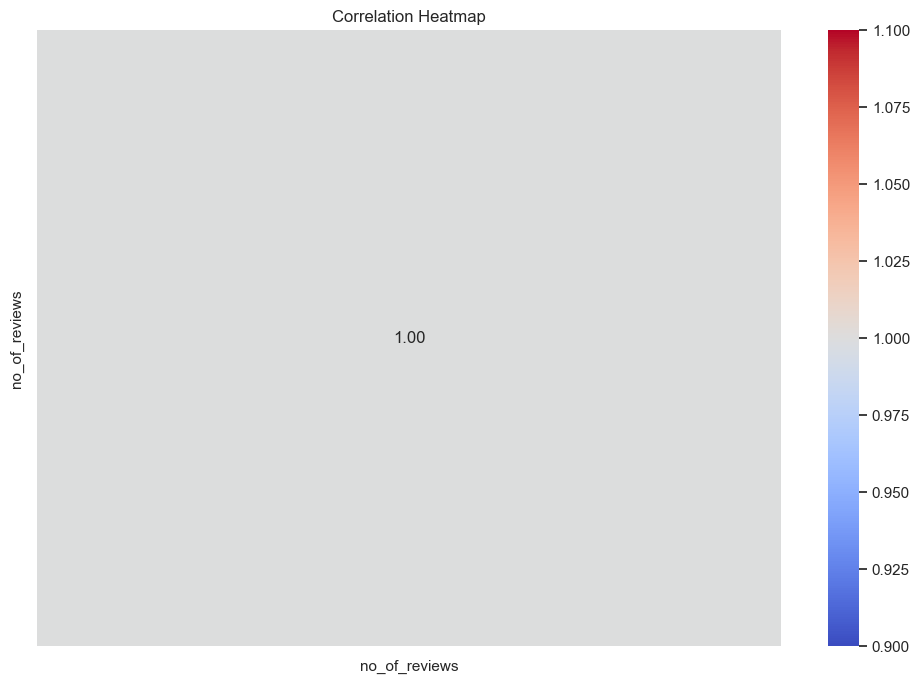

In [11]:
# Selecting only numerical features to avoid errors while calculating correlation, as df.corr() doesn't support text data

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title('Correlation Heatmap')
plt.show()


Correlation Heatmap: Current Observation

In this step, we generated a correlation heatmap using the feature `no_of_reviews`. A correlation matrix helps identify how strongly pairs of numerical variables are related.

---

 What Is Correlation?

- **Correlation values range from -1 to 1**:
  - **+1** → Perfect positive correlation
  - **0** → No linear relationship
  - **–1** → Perfect negative correlation

Normally, this heatmap is used to:
- Detect multicollinearity
- Understand which features influence each other
- Assist in feature selection

## Current Limitation

Since the dataset currently includes only one numerical feature (`no_of_reviews`), the heatmap shows a correlation value of `1.00` — which just means the feature is perfectly correlated with itself.

This is always true and doesn’t provide any analytical insight.

---

### How to Make It Useful

To extract meaningful patterns, we should include **more numerical features**. Some ideas include:

| Feature                 | Description                                 |
|------------------------|---------------------------------------------|
| `rating`               | Convert to float if it’s in string format   |
| `pregnancy_category`   | Map labels (e.g. A, B, C) to numeric scores |
| `drug_class`           | Label encode categories                     |
| `review_length`        | Create new feature from review text         |

Once multiple numerical features are added, a heatmap can help us understand:

- Which variables move together
- Which features are redundant
- How to choose inputs for further modeling

---

### Final Note

As it stands, this heatmap only confirms that `no_of_reviews` correlates with itself. Once more numeric data is included, this visualization will become much more insightful.



##  Association Rule Mining on Side Effects (Apriori Algorithm)

In this step, we use **unsupervised learning** to uncover hidden relationships between side effects reported by drug users. The goal is to find which side effects tend to occur together frequently and significantly.

---

### Data Cleaning & Preparation

We begin by preparing the `side_effects` column:

- Convert values to string format to ensure consistency
- Remove invalid entries such as `'NaN'`, `'unknown'`, or blank strings
- Split side effects (comma-separated) into a list format for each record
- Remove unusually long entries or sentences that are not real symptoms (e.g., "felt better", "no side effect noticed")

> We keep only effects that are short, meaningful (1–3 words), and likely to be individual symptoms.

---

### One-Hot Encoding with `TransactionEncoder`

We use the `TransactionEncoder` from `mlxtend` to one-hot encode the list of side effects for each user. This converts our data into a format suitable for frequent pattern mining.

Each row now represents a user, and each column is a binary value indicating whether that specific side effect was experienced.

---

### Applying the Apriori Algorithm

We use the **Apriori algorithm** to identify frequently co-occurring side effects with:

- `min_support = 0.01` → includes side effects that appear in at least 1% of all user reports
- `max_len = 2` → limits to pairs of side effects for simplicity and interpretability
- `low_memory = True` → optimizes performance on large datasets

This generates a list of **frequent itemsets** — combinations of side effects that commonly occur together.

---

### Generating Association Rules

From the frequent itemsets, we generate **association rules** using:

- `metric = "confidence"` → how often the rule holds true
- `min_threshold = 0.5` → at least 50% confidence required

The resulting rules help us understand patterns like:
> If a user experiences *Side Effect A*, there's a 70% chance they also experience *Side Effect B*.

To improve readability, the rule components (`antecedents` and `consequents`) are converted into clean comma-separated strings.

---

###  Output: Top 10 Association Rules

We sort the rules by **confidence** and display the top 10 combinations, along with their:

- **Support** (how often the rule appears overall)
- **Confidence** (likelihood of B given A)
- **Lift** (strength of association relative to chance)

These rules are useful for:
- Identifying high-risk side effect combinations
- Drug safety monitoring
- Healthcare recommendation systems


In [12]:


# Ensure 'side_effects' column is clean and string-based
df['side_effects'] = df['side_effects'].astype(str)
df = df[~df['side_effects'].str.lower().isin(['nan', 'unknown', ''])]

# Split side effects into list format
df['side_effects_list'] = df['side_effects'].apply(lambda x: [i.strip() for i in x.split(',')])

# Remove side effects that are actually long sentences
def is_valid_effect(effect):
    return len(effect.strip()) > 1 and len(effect.split()) <= 3 and len(effect) <= 25

df['side_effects_list'] = df['side_effects_list'].apply(
    lambda lst: [e for e in lst if is_valid_effect(e)]
)


from mlxtend.preprocessing import TransactionEncoder

# One-hot encode the side effects list
te = TransactionEncoder()
te_array = te.fit_transform(df['side_effects_list'])
df_te = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets with a minimum support of 0.01
from mlxtend.frequent_patterns import apriori, association_rules

# ✅ Apriori with limited memory usage and 2-item combinations max
frequent_itemsets = apriori(
    df_te,
    min_support=0.01,
    use_colnames=True,
    max_len=2,
    low_memory=True
)


# Generate association rules with a minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Make output human-readable
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Display top 10 rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False).head(10)

# Using Apriori to find frequent combinations of side effects
# and applying association_rules to detect patterns between them





,antecedents,consequents,support,confidence,lift
1226,unexplained wounds,tongue,0.015365,1.0,1.314815
31,agitated,aggressive,0.065301,1.0,15.313725
29,unexplained wounds,aggression,0.015365,1.0,31.877551
23,new behavior problems,aggression,0.014085,1.0,31.877551
20,hostility,aggression,0.016645,1.0,31.877551
1208,thinning skin,tongue,0.012164,1.0,1.314815
1211,throwing up,tongue,0.015365,1.0,1.314815
1203,unusual bruising,swollen glands,0.040333,1.0,10.923077
1207,unusual drowsiness,tenderness,0.012164,1.0,19.283951
47,aggressive,restless,0.065301,1.0,13.465517


C:\Users\kjha0\AppData\Local\Temp\ipykernel_7836\752667823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rules_sorted['antecedents'] + " → " + rules_sorted['consequents'],


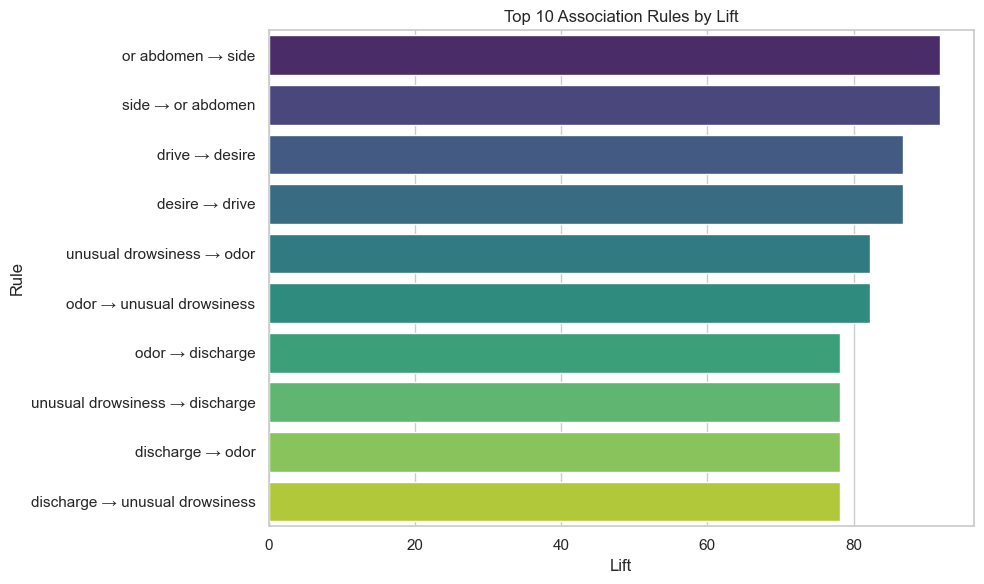

In [13]:
rules_sorted = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=rules_sorted['antecedents'] + " → " + rules_sorted['consequents'],
            x=rules_sorted['lift'], palette='viridis')
plt.title("Top 10 Association Rules by Lift")
plt.xlabel("Lift")
plt.ylabel("Rule")
plt.tight_layout()
plt.show()


In [14]:
# Saving the processed dataset to 'cleaned_drugs_dataset.csv' for further analysis or ML applications

df.to_csv('cleaned_drugs_dataset.csv', index=False)
